# Data Exploitation | Exports Analytics | Exploratory Data Analysis
Using some insights from the general EDA in the Formatted Zone, explore the data from the sandboxes

In [2]:
from database_settings import postgres_utilities
import pandas as pd
from data_exploitation.exports_analytics.data.scripts import time_series_generator
import time_granularities_generator
import time_granularities_analysis
from tqdm.notebook import tqdm

In [3]:
# Get available headings from peru_exports_sandbox
engine = postgres_utilities.engine()
available_headings = postgres_utilities.run_query_file(engine,
                                                       './../../data/queries/read_available_headings.sql')
available_headings = pd.DataFrame(available_headings)
available_headings

Connected to Formatted Zone successfully!


,heading,description
0,0712909000,Otras hortalizas y mezclas de hortalizas corta...
1,0805291000,Tangelo (Citrus reticulata x Citrus paradisis)...
2,0810400000,"Arándanos rojos, mirtilos y demas frutos del g..."
3,0713359000,"Frijoles (fréjoles, porotos, alubias, judías) ..."
4,0805502100,"Limón (limón sutil, limón común, limón criollo..."
5,0810901000,"Granadilla, maracuya (parchita) y demas frutas..."
6,0702000000,Tomates frescos o refrigerados
7,0709999000,Otras hortalizas frescas o refrigeradas
8,0801220000,Nueces del Brasil sin cáscara
9,0710400000,"Maiz dulce incluso cocidos, congelados"


In [33]:
# Choose a heading
chosen_heading = '0709200000'

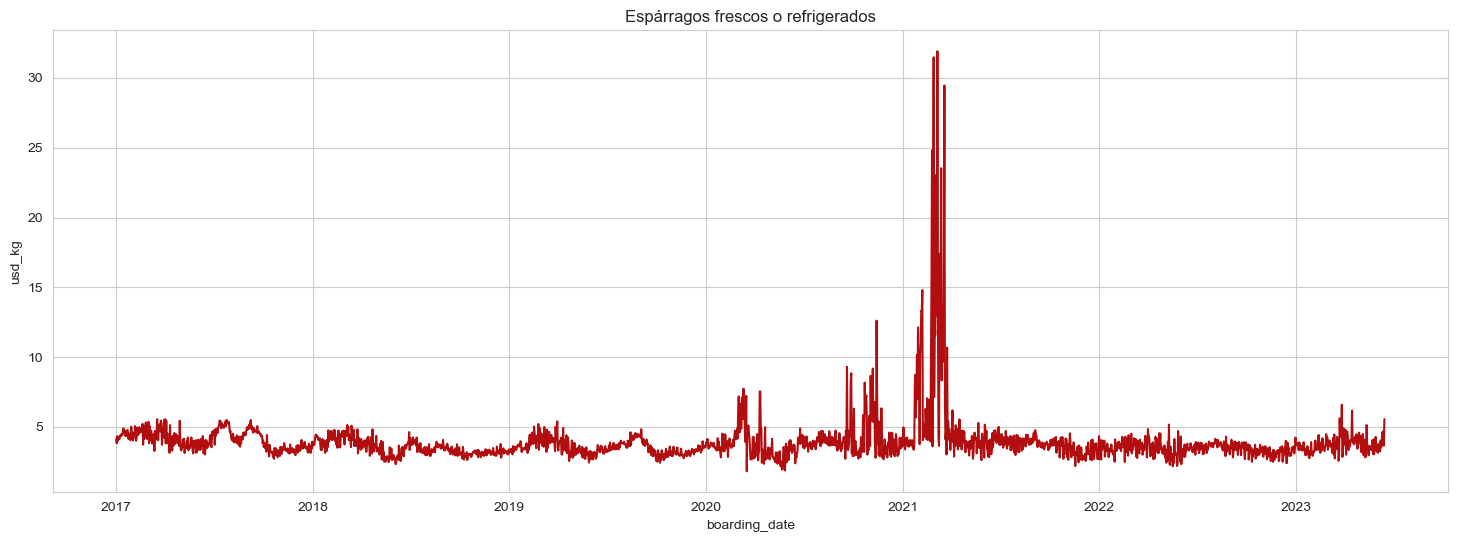

In [34]:
# Get a time-series
ts = time_series_generator.generate(chosen_heading, 'usd_kg')
ts.plot()

In [6]:
# Add the time granularities
time_granularities, priority = time_granularities_generator.generate(ts.start_date, ts.end_date)
data = pd.concat([ts.data, time_granularities], axis=1)

In [14]:
# # Make the seasonality analysis
# seasonality_analysis = time_granularity_analysis(cyclic_granularity='month_in_quarter',
#                                     observations='usd_kg',
#                                     data=data)
# seasonality_analysis.plot(outliers=True)

In [16]:
# Get a list of seasonal patterns in order of extraction
granularities = ['semester_in_year',
                 'quarter_in_year',
                 'month_in_year',
                 'month_in_semester',
                 'month_in_quarter',
                 'quarter_in_semester',
                 'day_in_month',
                 'day_in_week',
                 'week_in_year',
                 'week_in_semester',
                 'week_in_quarter',
                 'week_in_month']

seasonal_patterns = []
for g in tqdm(granularities):
    print('Analyzing {}...'.format(g))
    seasonality_analysis = time_granularities_analysis.analysis(cyclic_granularity=g,
                                    observations='usd_kg',
                                    data=data)
    # seasonality_analysis.plot()
    if seasonality_analysis.is_seasonal(): seasonal_patterns.append(g)
seasonal_patterns = [x for x in priority if x in seasonal_patterns]
seasonal_patterns

  0%|          | 0/12 [00:00<?, ?it/s]

Analyzing semester_in_year...
Analyzing quarter_in_year...
Analyzing month_in_year...


C:\Users\sergio\anaconda3\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Analyzing month_in_semester...
Analyzing month_in_quarter...
Analyzing quarter_in_semester...
Analyzing day_in_month...
Analyzing day_in_week...
Analyzing week_in_year...
Analyzing week_in_semester...
Analyzing week_in_quarter...
Analyzing week_in_month...


['week_in_year',
 'week_in_semester',
 'week_in_quarter',
 'month_in_year',
 'month_in_semester',
 'quarter_in_year',
 'month_in_quarter',
 'semester_in_year']